## Question 1

In [1]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
## functions
def getMaxEigenPair(G, niter=100):
    n=G.shape[0]
    x = np.ones((n,1)).reshape(n,1)
    # print("shape of x is: ", x.shape)
    i=0
    for i in range(niter):
        # print("Curr x is: \n", x)
        p = x/sp.linalg.norm(x)
        x = G @ p
        eigenVal = p.T @ (G @ p)
    return p, eigenVal

In [3]:
# create the A matrix (adjacency matrix) of 11x11
A = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# create the D matrix (degree matrix) of 11x11
D = np.diag(np.sum(A, axis=0))
# print(D)

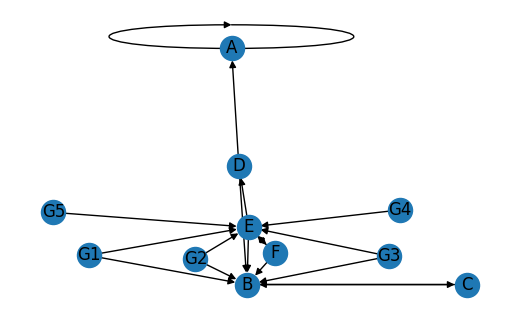

In [4]:
# plot a directed graph with labels given the A matrix
GraphA = nx.DiGraph()
# for each column, we add an edge from the column to row
for i in range(A.shape[1]):
    column = A[:, i]
    for j in range(len(column)):
        if column[j] == 1:
            GraphA.add_edges_from([(i, j)])

# create a dictionary of labels
labels = dict(zip(GraphA.nodes(), ["A", "B", "C", "D", "E", "F", "G1", "G2", "G3", "G4", "G5"]))
# draw
plt.figure(figsize=(5, 3))
nx.draw(GraphA, labels=labels, with_labels=True)

In [5]:
# define parameters
q = 0.85
N = A.shape[1]
E = np.ones((N, N))

# create the G matrix (transition matrix) (normalized)
G = ( (1 - q)/N ) * E + q * (A @ np.linalg.inv(D))
G[0, 0] = (1-q)/N

(a) Using q = 0.85, estimate the PageRank vector for this network using the power iteration alg.

(b) Relative rank of the pages.

In [6]:
p, eigenVal = getMaxEigenPair(G, niter=1000)
print("The PR vector is: \n", p.T)

# sort the PR vector with argsort with descending order
p_ids = np.argsort(p.squeeze(), axis=0)[::-1]
labels = ["A", "B", "C", "D", "E", "F", "G1", "G2", "G3", "G4", "G5"]
print("The sorted PR vector is: \n", p[p_ids].T)
print("The labels in desc. order of vector magnitude: \n", np.array(labels)[p_ids])

The PR vector is: 
 [[0.05339977 0.72903043 0.66102845 0.06379769 0.13148509 0.06379769
  0.02559634 0.02559634 0.02559634 0.02559634 0.02559634]]
The sorted PR vector is: 
 [[0.72903043 0.66102845 0.13148509 0.06379769 0.06379769 0.05339977
  0.02559634 0.02559634 0.02559634 0.02559634 0.02559634]]
The labels in desc. order of vector magnitude: 
 ['B' 'C' 'E' 'D' 'F' 'A' 'G5' 'G3' 'G4' 'G2' 'G1']


(c) Do the relative ranks make sense? Explain.

Ans:

Since the page ranks does not simply depend on the number of inward-pointing links to the page, but the "importance" by its own method of calculating the metric. So yes, that makes sense. by just looking at the number of arrows in and out of the "page"

(d) Connect a link going from B to on the small purple pages and recompute the PageRank vector. Comment on your observations and explain the result.

In [7]:
# connect a link from B to g5
# create the A matrix (adjacency matrix) of 11x11
A_mod = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
                [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# create the D matrix (degree matrix) of 11x11
D_mod = np.diag(np.sum(A_mod, axis=0))

In [8]:
# define parameters
q = 0.85
N = A_mod.shape[1]
E = np.ones((N, N))

# create the G matrix (transition matrix) (normalized)
G = ( (1 - q)/N ) * E + q * (A_mod @ np.linalg.inv(D_mod))
G[0, 0] = (1-q)/N

p, eigenVal = getMaxEigenPair(G, niter=100)
print("The PR vector is: \n", p.T)

# sort the PR vector with argsort with descending order
p_ids = np.argsort(p.squeeze(), axis=0)[::-1]
labels = ["A", "B", "C", "D", "E", "F", "G1", "G2", "G3", "G4", "G5"]
print("The sorted PR vector is: \n", p[p_ids].T)
print("The labels in desc. order of vector magnitude: \n", np.array(labels)[p_ids])

The PR vector is: 
 [[0.11341857 0.67751646 0.33443482 0.17802125 0.4860343  0.17802125
  0.03464787 0.03464787 0.03464787 0.03464787 0.33443482]]
The sorted PR vector is: 
 [[0.67751646 0.4860343  0.33443482 0.33443482 0.17802125 0.17802125
  0.11341857 0.03464787 0.03464787 0.03464787 0.03464787]]
The labels in desc. order of vector magnitude: 
 ['B' 'E' 'G5' 'C' 'F' 'D' 'A' 'G3' 'G4' 'G2' 'G1']


Hypothesis:

We see the importance of g5 jumping up in rank. This could be due to the action of B (being a more important page) citing g5 (a less important page), which makes g5 be more "credible", hence moving up in rank.

## Question 3

In [9]:
A = np.array([[10, 1, 2],
              [1, 10, 3],
              [2, 3, 20]])

M = np.array([[100, -25, -20],
              [-25, 10, 4],
              [-20, 4, 100]])

(a) Estimate the largest eigval. of (1) using your power iter. code.

In [29]:
# we solve M^-1 * A * x = lambda * x
def getMaxEigenPair_Gen(A, M, niter=20000):
    n = A.shape[0]
    x = np.ones((n, 1)).reshape(n, 1)
    lu, piv = sp.linalg.lu_factor(M)
    for i in range(niter):
        p = x / sp.linalg.norm(x)
        # solve for x in M * x = A * p with LU factorization
        x = sp.linalg.lu_solve((lu, piv), A @ p)
        eigenVal = p.T @ (A @ p) / (p.T @ (M @ p)) 
    return p, eigenVal

In [31]:
eigs = sp.linalg.eig(A, M)
print("Dominant eigenvalue is: ", eigs[0][0])
print("Dominant eigenvector is: ", eigs[1][:, 0])
p, eigenVal = getMaxEigenPair_Gen(A, M)
print("PowerIter EigVal: \n", eigenVal)
print("PowerIter EigVec: \n", p.T)

Dominant eigenvalue is:  (3.030198931509619+0j)
Dominant eigenvector is:  [0.25851672 0.9656551  0.02606401]
PowerIter EigVal: 
 [[3.03019893]]
PowerIter EigVec: 
 [[0.25851672 0.9656551  0.02606401]]


(c) show numerically that A and M are positive definite.

In [12]:
# A matrix is positive definite if and only if all of its eigenvalues are positive.
eigs = sp.linalg.eig(A)
print("Eigenvalues of A are: ", eigs[0])
eigs = sp.linalg.eig(M)
print("Eigenvalues of M are: ", eigs[0])

print("A is positive definite: ", np.all(eigs[0] > 0))
print("M is positive definite: ", np.all(eigs[0] > 0))

Eigenvalues of A are:  [21.25920382+0.j  9.83812249+0.j  8.90267369+0.j]
Eigenvalues of M are:  [  3.5076778 +0.j 123.86358858+0.j  82.62873362+0.j]
A is positive definite:  True
M is positive definite:  True
